C:/Users/DELL/Desktop/IP Project\DAY-1 (1).jpg - Leaf Count: 2
C:/Users/DELL/Desktop/IP Project\DAY-2 (1).jpg - Leaf Count: 2
C:/Users/DELL/Desktop/IP Project\DAY-3 (1).jpg - Leaf Count: 2
C:/Users/DELL/Desktop/IP Project\DAY-4 (1).jpg - Leaf Count: 3
C:/Users/DELL/Desktop/IP Project\DAY-5 (1).jpg - Leaf Count: 5
C:/Users/DELL/Desktop/IP Project\DAY-6 (1).jpg - Leaf Count: 6
C:/Users/DELL/Desktop/IP Project\DAY-7 (1).jpg - Leaf Count: 5
C:/Users/DELL/Desktop/IP Project\DAY-8 (1).jpg - Leaf Count: 5
C:/Users/DELL/Desktop/IP Project\DAY-9 (1).jpg - Leaf Count: 8
C:/Users/DELL/Desktop/IP Project\DAY-10 (1).jpg - Leaf Count: 3
C:/Users/DELL/Desktop/IP Project\DAY-11 (1).jpg - Leaf Count: 5
C:/Users/DELL/Desktop/IP Project\DAY-12 (1).jpg - Leaf Count: 8
C:/Users/DELL/Desktop/IP Project\DAY-13 (1).jpg - Leaf Count: 4
C:/Users/DELL/Desktop/IP Project\DAY-14 (1).jpg - Leaf Count: 4


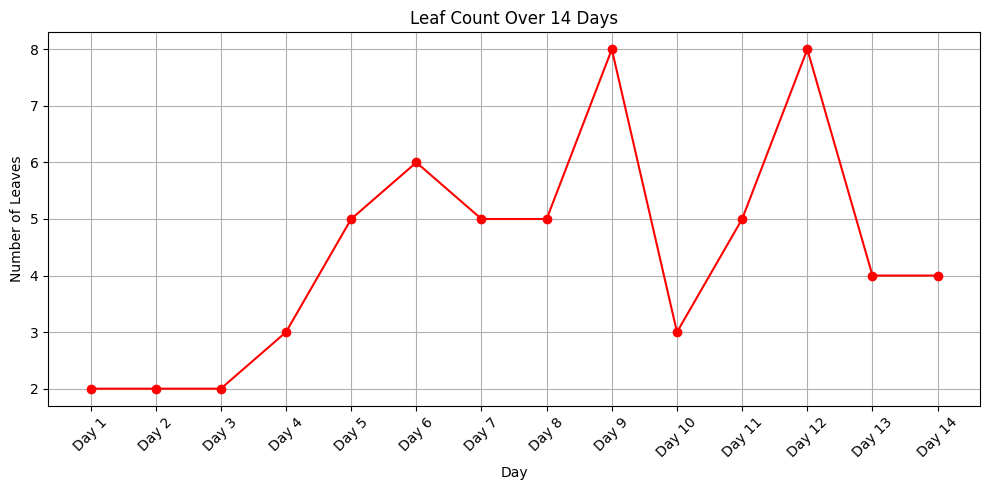

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def remove_background(image):
    mask = np.zeros(image.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    rect = (50, 50, image.shape[1]-50, image.shape[0]-50)
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    return image * mask2[:, :, np.newaxis]

def detect_leaves(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Missing: {image_path}")
        return 0

    image = cv2.resize(image, (600, 400))
    bg_removed = remove_background(image)
    hsv = cv2.cvtColor(bg_removed, cv2.COLOR_BGR2HSV)

    lower_green = np.array([30, 40, 10])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leaf_contours = [cnt for cnt in contours if 100 < cv2.contourArea(cnt) < 5000]

    # Optionally show the detected mask and contours for each image
    # Uncomment below lines to see visuals for debugging
    # cv2.drawContours(image, leaf_contours, -1, (0, 255, 0), 2)
    # cv2.imshow("Detected Leaves", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    print(f"{image_path} - Leaf Count: {len(leaf_contours)}")
    return len(leaf_contours)

# Directory where images are stored
base_path = "C:/Users/DELL/Desktop/IP Project"

# Store results
days = []
leaf_counts = []

for day in range(1, 15):
    # Construct the image filename, e.g., DAY-1 (1).jpg, DAY-2 (1).jpg, ...
    img_filename = f"DAY-{day} (1).jpg"
    img_path = os.path.join(base_path, img_filename)

    count = detect_leaves(img_path)
    days.append(f"Day {day}")
    leaf_counts.append(count)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(days, leaf_counts, marker='o', linestyle='-', color='Red')
plt.title("Leaf Count Over 14 Days")
plt.xlabel("Day")
plt.ylabel("Number of Leaves")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
